In [1]:
import json
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [8]:
total_has_bot = 0
total = 0
only_has_bot = 0
length = [[], []]
time_gap = [[], []]
no_users = [[], []]
with open('/scratch/wiki_dumps/attacker_in_conv/all.json') as f:
    for line in f:
        conv_id, clss, conversation = json.loads(line)
        actions = conversation['action_feature']
        has_bot = 0
        length[clss].append(len(actions))
        max_time = 0
        min_time = actions[0]['timestamp_in_sec']
        users = {}
        for action in actions:
            if 'user_text' in action and 'bot' in action['user_text'].lower():
                has_bot = 1
            max_time = max(max_time, action['timestamp_in_sec'])
            min_time = min(min_time, action['timestamp_in_sec'])
            if 'user_text' in action:
                users['user_text'] = True
        no_users[clss].append(len(users.keys()))
        time_gap[clss].append(max_time - min_time)
        total_has_bot += has_bot
        only_has_bot += int(has_bot / len(actions))
        total += 1

In [9]:
print(only_has_bot, total_has_bot, total)

0 1334 13860


In [10]:
def bucketing(buckets, lst):
    ret = []
    cnt = []
    for b in buckets:
        cnt.append(0)
    for item in lst:
        last = buckets[0]
        r = 0
        for b in buckets[1:]:
            if item >= last and item < b:
                break
            r += 1
        cnt[r] += 1
    return cnt

In [11]:
def hist(buckets, x, y, xlabel, title):
    
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111)

    ## the data
    N = len(buckets)

    ## necessary variables
    ind = np.arange(N)                # the x locations for the groups
    width = 0.45                      # the width of the bars

    ## the bars
    rects1 = ax.bar(ind+0.26, x, width,
                    color='red',
                    alpha = 0.35)

    rects2 = ax.bar(ind+width+0.26, y, width,
                        color='blue',
                        alpha=0.5)

    # axes and labels
    ax.set_xlim(-width,len(ind)+width)
   # ax.set_ylim(0,45)
    ax.set_ylabel('Number of Conversations')
    ax.set_xlabel(xlabel)
    ax.set_title(title)
    xTickMarks = buckets
    ax.set_xticks(ind+width)
    xtickNames = ax.set_xticklabels(xTickMarks)
    plt.setp(xtickNames, rotation=45, fontsize=10)

    ## add a legend
    ax.legend( (rects1[0], rects2[0]), ('Bad', 'Good') )
    for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
        item.set_fontsize(15)

    plt.show()

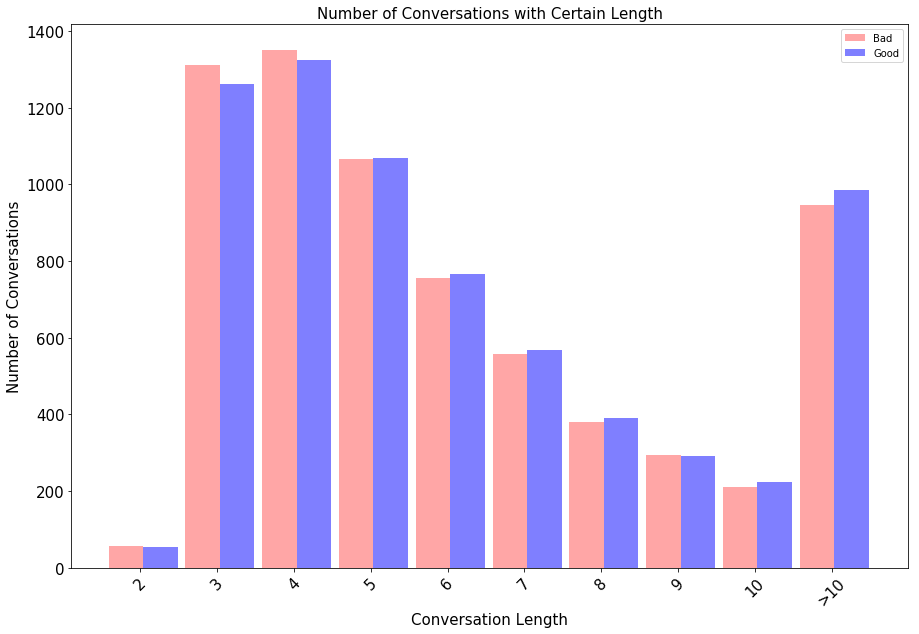

In [12]:
buckets = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
bucket_name = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '>10']
bl = [[], []]
bl[0] = bucketing(buckets, length[0])
bl[1] = bucketing(buckets, length[1])
hist(bucket_name[2:], bl[0][2:], bl[1][2:], 'Conversation Length', 'Number of Conversations with Certain Length')

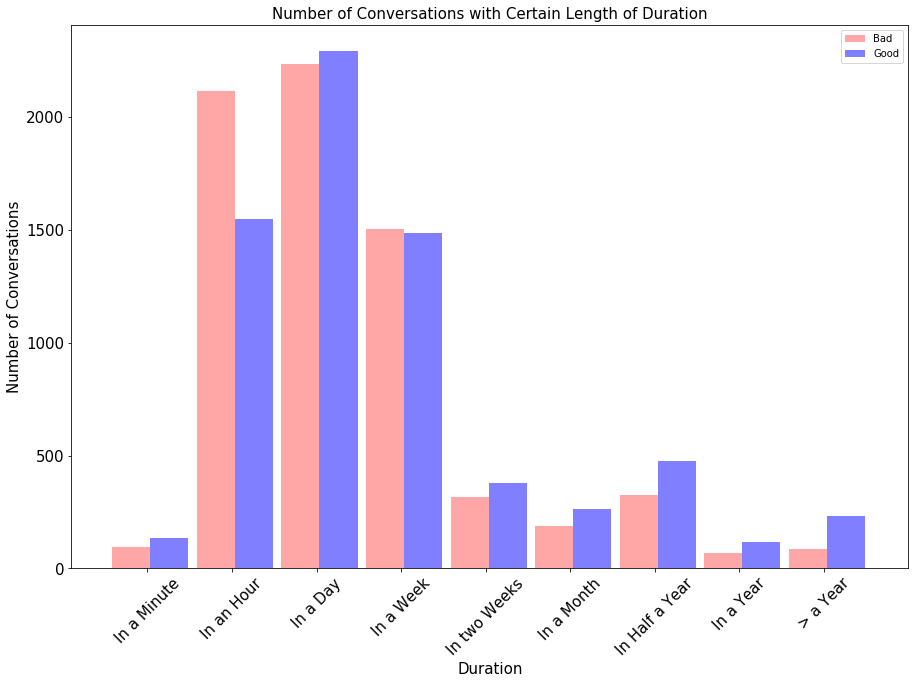

In [13]:
buckets = [0, 60, 60*60, 60*60*24, 60*60*24*7, 60*60*24*15, 60*60*24*30, 60*60*24*30*6, 60*60*24*365]
bucket_name = ['In a Minute', 'In an Hour', 'In a Day', 'In a Week', 'In two Weeks', 'In a Month', \
               'In Half a Year', 'In a Year', '> a Year']
tl = [[], []]
tl[0] = bucketing(buckets, time_gap[0])
tl[1] = bucketing(buckets, time_gap[1])
hist(bucket_name, tl[0], tl[1], 'Duration', 'Number of Conversations with Certain Length of Duration')

In [7]:
total_has_bot = 0
total = 0
with open('/scratch/wiki_dumps/train_test/len5-all.json') as f:
    for line in f:
        conv_id, clss, conversation = json.loads(line)
        actions = conversation['action_feature']
        has_bot = 0
        for action in actions:
            if 'user_text' in action and 'bot' in action['user_text'].lower():
                has_bot = 1
        total_has_bot += has_bot
        total += 1

In [8]:
print(total_has_bot, total)

2894 17150
